In [1]:

%pip install pmdarima 
## installing pmdarima


# Importing Python Libraries

In [2]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse,rmse,meanabs
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
import fbprophet
from fbprophet import Prophet
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM
from keras.utils import np_utils 
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


BTS dataset use for 5 alogorithm
Comparing Linear Regression, Random Forest Regression,
 XGBoost, LSTMs, and ARIMA Time Series Forecasting


# Reading BTS datasets

In [3]:
df_BTS_train= pd.read_csv("/content/BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv",parse_dates=False)
df_BTS_test = pd.read_csv("/content/BTC-USD Out of Time Testing 1st Jan 2022 to 4th Feb 2022.csv",parse_dates=False)

In [4]:
df_BTS_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [5]:
df_BTS_test.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
1,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
3,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
4,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


In [6]:
df_BTS_train.shape
df_BTS_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Exploratory Data Analysis (EDA)

In [7]:
df_BTS_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [8]:
#Checking missing values for 'confirmed' cases
df_BTS_train.reset_index(inplace=True)
df_BTS_train.isnull().sum()

index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Checking **Price** increase  'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'

In [9]:
#Price open
BTS_Open= df_BTS_train[['Date','Open']]
BTS_Open.tail()

,Date,Open
2188,2021-12-28,50679.859375
2189,2021-12-29,47623.871094
2190,2021-12-30,46490.605469
2191,2021-12-31,47169.371094
2192,2022-01-01,46311.746094


In [10]:
#Price open
BTS_High= df_BTS_train[['Date','High']]
BTS_High.tail()

,Date,High
2188,2021-12-28,50679.859375
2189,2021-12-29,48119.742188
2190,2021-12-30,47879.964844
2191,2021-12-31,48472.527344
2192,2022-01-01,47827.312500


In [11]:
#Price open
BTS_Low= df_BTS_train[['Date','Low']]
BTS_Low.tail()

,Date,Low
2188,2021-12-28,47414.210938
2189,2021-12-29,46201.496094
2190,2021-12-30,46060.312500
2191,2021-12-31,45819.953125
2192,2022-01-01,46288.484375


In [12]:
#Price open
BTS_Close= df_BTS_train[['Date','Close']]
BTS_Close.tail()

,Date,Close
2188,2021-12-28,47588.855469
2189,2021-12-29,46444.710938
2190,2021-12-30,47178.125000
2191,2021-12-31,46306.445313
2192,2022-01-01,47686.812500


In [13]:
#Price open
BTS_Adj_close= df_BTS_train[['Date','Adj Close']]
BTS_Adj_close.tail()

,Date,Adj Close
2188,2021-12-28,47588.855469
2189,2021-12-29,46444.710938
2190,2021-12-30,47178.125000
2191,2021-12-31,46306.445313
2192,2022-01-01,47686.812500


In [14]:
#Price open
BTS_Volume= df_BTS_train[['Date','Volume']]
BTS_Volume.tail()

,Date,Volume
2188,2021-12-28,33430376883
2189,2021-12-29,30049226299
2190,2021-12-30,26686491018
2191,2021-12-31,36974172400
2192,2022-01-01,24582667004


##Data Visualization

Visualising the spread geographically

How the Coronavirus cases are rising?

In [15]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
plotly.io.renderers.default = 'colab'

In [16]:
#interactive graphs using plotly
# Rise of Price line plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_BTS_train['Date'], y = df_BTS_train['Open'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of stock price (Cumulative)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# Rise COVID-19 cases reported barplot

import plotly.express as px
fig = px.bar(df_BTS_train, x="Date", y="Open", barmode='group', height=400)
fig.update_layout(title_text='stock open on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [17]:
# import plotly.express as px
fig = px.bar(df_BTS_train, x="Date", y="Open", color='Open', orientation='v', height=600,
             title='Prcie  in Open', color_discrete_sequence = px.colors.cyclical.IceFire)


fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(df_BTS_train, x="Date", y="High", color='High', orientation='v', height=600,
             title='Price in High', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(df_BTS_train, x="Date", y="Low", color='Low', orientation='v', height=600,
             title='Price in Low', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(df_BTS_train, x="Date", y="Close", color='Close', orientation='v', height=600,
             title='Price in Close', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [18]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left", subplot_titles=("Open","High", "Low","Close"))

fig.add_trace(go.Scatter(x=df_BTS_train['Date'], y=df_BTS_train['Open'], marker=dict(color=df_BTS_train['Open'], coloraxis="coloraxis")), 1, 1)

fig.add_trace(go.Scatter(x=df_BTS_train['Date'], y=df_BTS_train['High'], marker=dict(color=df_BTS_train['High'], coloraxis="coloraxis")), 1, 2)

fig.add_trace(go.Scatter(x=df_BTS_train['Date'], y=df_BTS_train['Low'], marker=dict(color=df_BTS_train['Low'], coloraxis="coloraxis")), 2, 1)

fig.add_trace(go.Scatter(x=df_BTS_train['Date'], y=df_BTS_train['Close'], marker=dict(color=df_BTS_train['Close'], coloraxis="coloraxis")), 2,2 )


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Trend of Stock prices")

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [19]:
# Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'
title = 'Overall Comparison'
labels = ['Open', 'High', 'Low',]
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [10, 10, 12]
line_size = [1, 1, 6]

fig = go.Figure()


fig.add_trace(go.Scatter(x=df_BTS_train['Date'], 
                 y=df_BTS_train['Open'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True,
    ))
fig.add_trace(go.Scatter(x=df_BTS_train['Date'], 
                 y=df_BTS_train['High'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True,
    ))

fig.add_trace(go.Scatter(x=df_BTS_train['Date'], 
                 y=df_BTS_train['Low'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True,
    ))

    
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Overall Comparison',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative Prices')

fig.show()

In [20]:
title = 'Overall Comparison'
labels = ['Close', 'Adj Close', 'Volume']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [10, 10, 12]
line_size = [1, 1, 6]

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_BTS_train['Date'], 
                 y=df_BTS_train['Close'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True,
    ))
fig.add_trace(go.Scatter(x=df_BTS_train['Date'], 
                 y=df_BTS_train['Adj Close'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True,
    ))

fig.add_trace(go.Scatter(x=df_BTS_train['Date'], 
                 y=df_BTS_train['Volume'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True,
    ))
    
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Overall Comparison',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()

In [21]:
fig = go.Figure()
#Plotting datewise cases
fig.add_trace(go.Scatter(x=df_BTS_train['Date'], y=df_BTS_train['Open'], mode='lines+markers', name='stock OPen',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=df_BTS_train['Date'], y=df_BTS_train['High'], mode='lines+markers', name='Stock High', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=df_BTS_train['Date'], y=df_BTS_train['Low'], mode='lines+markers', name='Stock Low', line=dict(color='Green', width=2)))
fig.add_trace(go.Scatter(x=df_BTS_train['Date'], y=df_BTS_train['Close'], mode='lines+markers', name='Stock Close',line=dict(color='orange', width=2)))
fig.add_trace(go.Scatter(x=df_BTS_train['Date'], y=df_BTS_train['Adj Close'], mode='lines+markers', name='Stock Adj Close',line=dict(color='purple', width=2)))
fig.add_trace(go.Scatter(x=df_BTS_train['Date'], y=df_BTS_train['Volume'], mode='lines+markers', name='Stock Volume',line=dict(color='yellow', width=2)))
fig.update_layout(title ='Open,High,Low,Close,Adj Close,Volume', xaxis_tickfont_size=14,yaxis=dict(title='Number of Stock'))

fig.show()

#Building Forecasting Models by applying different algorithms 













#**Best forcasting module  in confirmed cases in globle world** - Prasanta to be used later

In [22]:
BTS_Open.head()

,Date,Open
0,2016-01-01,430.721008
1,2016-01-02,434.622009
2,2016-01-03,433.578003
3,2016-01-04,430.061005
4,2016-01-05,433.069000


In [23]:
price_df = BTS_Open.groupby('Date').sum()['Open'].reset_index()
price_df.Date = pd.to_datetime(price_df.Date)
price_df.head()

,Date,Open
0,2016-01-01,430.721008
1,2016-01-02,434.622009
2,2016-01-03,433.578003
3,2016-01-04,430.061005
4,2016-01-05,433.069000


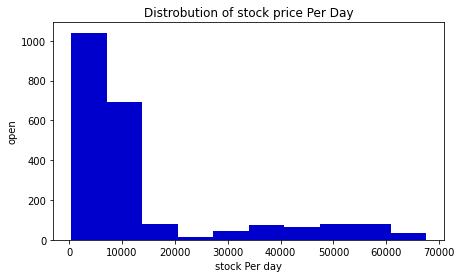

In [24]:
#Defining function for monthly stock per day
def confirmed_cases_per_day():
    fig, ax = plt.subplots(figsize=(7,4))
    plt.hist(price_df.Open, color='mediumblue')
    
    ax.set(xlabel = "stock Per day",
           ylabel = "open",
           title = "Distrobution of stock price Per Day")
    
confirmed_cases_per_day()

In [25]:
# Average monthly confirmed cases at global level
average_stock_price = price_df.Open.mean()
print(f"Overall average stock price: {average_stock_price}cases")   

Overall average stock price: 13005.79287097169cases


##Determining 'Stationarity' of Time series data

In [26]:
#Defining function for time series analysis
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x_col, y_col, data=data, ax=ax, color='mediumblue', label='Total Open price')
    
    second = data.groupby(data.Date.dt.year)[y_col].mean().reset_index()
    second.Date = pd.to_datetime(second.Date,format='%Y')
    sns.lineplot((second.Date + datetime.timedelta(365/12)), y_col, data=second, ax=ax, color='red', label='Mean Open price')   
    
    ax.set(xlabel = "Date",
           ylabel = "Open",
           title = title)
    
    sns.despine()

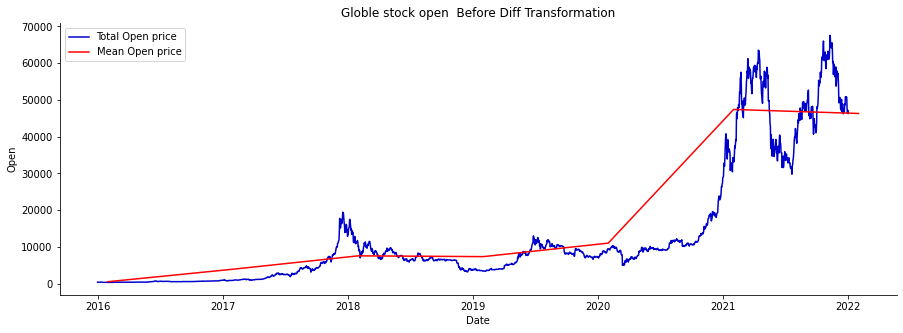

In [27]:
time_plot(price_df, 'Date', 'Open','Globle stock open  Before Diff Transformation')

In [28]:
#Defining function for differencing? Please check
def get_diff(data):
    data['price_diff'] = data.Open.diff()
    data = data.dropna()
    
    return data

In [29]:
stationary_df = get_diff(price_df)
stationary_df.head()

,Date,Open,price_diff
1,2016-01-02,434.622009,3.901001
2,2016-01-03,433.578003,-1.044006
3,2016-01-04,430.061005,-3.516998
4,2016-01-05,433.069000,3.007995
5,2016-01-06,431.855988,-1.213012


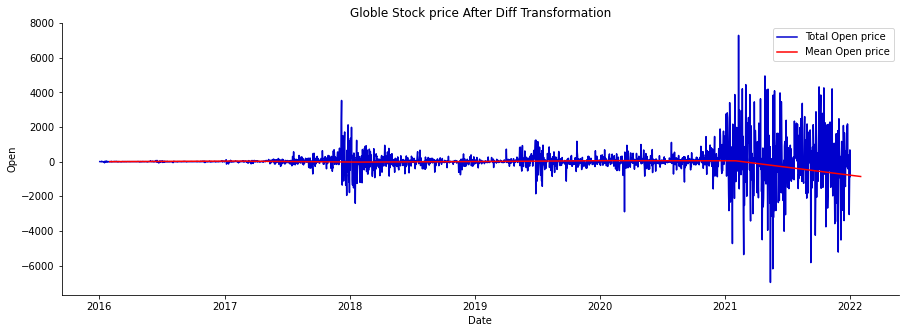

In [30]:
time_plot(stationary_df, 'Date', 'price_diff', 'Globle Stock price After Diff Transformation')

##Visualizing Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) of time series 

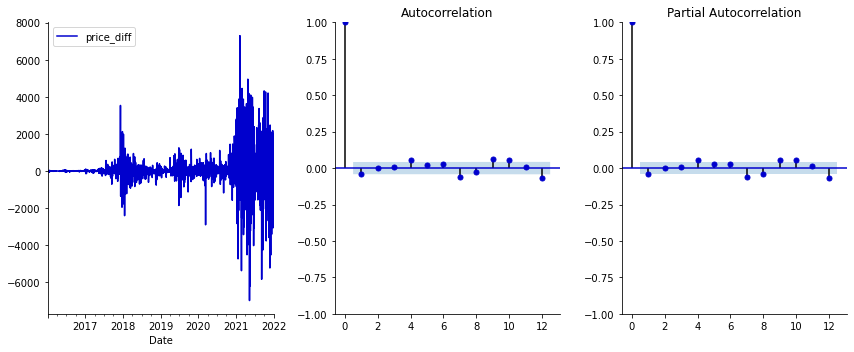

In [31]:
def plots(data, lags=None):
    
    # Convert dataframe to datetime index
    dt_data = data.set_index('Date').drop('Open', axis=1)
    dt_data.dropna(axis=0)
    
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    dt_data.plot(ax=raw, figsize=(12, 5), color='mediumblue')
    smt.graphics.plot_acf(dt_data, lags=lags, ax=acf, color='mediumblue')
    smt.graphics.plot_pacf(dt_data, lags=lags, ax=pacf, color='mediumblue')
    sns.despine()
    plt.tight_layout()

plots(stationary_df, lags=12); 

Prasanta - Can we summarize the observations from the graphical plots

##Preparing Dataset Modeling

In [32]:
#create dataframe for transformation from time series to supervised
def generate_supervised(data):
    supervised_df = data.copy()
    
    #create column for each lag
    for i in range(1,36):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['price_diff'].shift(i)
    
    #drop null values
    supervised_df = supervised_df.dropna().reset_index(drop=True)
    
   # supervised_df.to_csv('../data/model_df.csv', index=False)
    
    return supervised_df

In [33]:
model_df = generate_supervised(stationary_df)
model_df.tail()

,Date,Open,price_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,lag_31,lag_32,lag_33,lag_34,lag_35
2152,2021-12-28,50679.859375,-122.750000,373.917969,-426.226563,48.867188,2179.707031,-310.753906,2051.019531,179.015625,-146.804688,634.613282,-1434.476563,-1246.734375,520.710938,1669.929687,-3404.917969,759.886719,2090.222656,-377.511718,-2807.937500,-217.566407,85.820313,1168.347656,211.960938,-4526.359375,-2781.285157,-708.207031,309.406250,-922.148437,538.207031,2478.882812,1076.593750,-5223.855468,1794.867187,-400.433594,1261.296875,-2402.292968
2153,2021-12-29,47623.871094,-3055.988281,-122.750000,373.917969,-426.226563,48.867188,2179.707031,-310.753906,2051.019531,179.015625,-146.804688,634.613282,-1434.476563,-1246.734375,520.710938,1669.929687,-3404.917969,759.886719,2090.222656,-377.511718,-2807.937500,-217.566407,85.820313,1168.347656,211.960938,-4526.359375,-2781.285157,-708.207031,309.406250,-922.148437,538.207031,2478.882812,1076.593750,-5223.855468,1794.867187,-400.433594,1261.296875
2154,2021-12-30,46490.605469,-1133.265625,-3055.988281,-122.750000,373.917969,-426.226563,48.867188,2179.707031,-310.753906,2051.019531,179.015625,-146.804688,634.613282,-1434.476563,-1246.734375,520.710938,1669.929687,-3404.917969,759.886719,2090.222656,-377.511718,-2807.937500,-217.566407,85.820313,1168.347656,211.960938,-4526.359375,-2781.285157,-708.207031,309.406250,-922.148437,538.207031,2478.882812,1076.593750,-5223.855468,1794.867187,-400.433594
2155,2021-12-31,47169.371094,678.765625,-1133.265625,-3055.988281,-122.750000,373.917969,-426.226563,48.867188,2179.707031,-310.753906,2051.019531,179.015625,-146.804688,634.613282,-1434.476563,-1246.734375,520.710938,1669.929687,-3404.917969,759.886719,2090.222656,-377.511718,-2807.937500,-217.566407,85.820313,1168.347656,211.960938,-4526.359375,-2781.285157,-708.207031,309.406250,-922.148437,538.207031,2478.882812,1076.593750,-5223.855468,1794.867187
2156,2022-01-01,46311.746094,-857.625000,678.765625,-1133.265625,-3055.988281,-122.750000,373.917969,-426.226563,48.867188,2179.707031,-310.753906,2051.019531,179.015625,-146.804688,634.613282,-1434.476563,-1246.734375,520.710938,1669.929687,-3404.917969,759.886719,2090.222656,-377.511718,-2807.937500,-217.566407,85.820313,1168.347656,211.960938,-4526.359375,-2781.285157,-708.207031,309.406250,-922.148437,538.207031,2478.882812,1076.593750,-5223.855468


In [34]:
#Defining function for data preprocessing for ARIMA
def generate_arima_data(data):
    dt_data = stationary_df.set_index('Date').drop('Open', axis=1)    #Prasanta - why is stationary_df used inside the function?
    dt_data.dropna(axis=0)
    
    #dt_data.to_csv('../data/arima_df.csv')
    
    return dt_data

In [35]:
datetime_df = generate_arima_data(stationary_df)
datetime_df.tail()

,price_diff
Date,
2021-12-28,-122.750000
2021-12-29,-3055.988281
2021-12-30,-1133.265625
2021-12-31,678.765625
2022-01-01,-857.625000


In [36]:
#Function for Train-Test split
def tts(data):
    data = data.drop(['Date','Open'],axis=1)
    train, test = data[:-35].values, data[-35:].values  
     #Prasanta - need to understand how the sub-set of data is taken
    ##Needs to be configurable values as timeseries data cant use random splitting of data using test train split method 
    return train, test

train, test = tts(model_df)

In [37]:
train.shape

(2122, 36)

In [38]:
test.shape

(35, 36)

In [39]:
#Function for sclaing the data 
def scale_data(train_set, test_set):
    #apply Min Max Scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train_set)
    
    # reshape training set
    train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
    train_set_scaled = scaler.transform(train_set)
    
    # reshape test set
    test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
    test_set_scaled = scaler.transform(test_set)
    
    X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1].ravel()
    X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1].ravel()
    
    return X_train, y_train, X_test, y_test, scaler

X_train, y_train, X_test, y_test, scaler_object = scale_data(train, test)

##Defining Functions for model building

In [40]:
#Bringing the data back to original scale
def undo_scaling(y_pred, x_test, scaler_obj, lstm=False):  
    #reshape y_pred
    y_pred = y_pred.reshape(y_pred.shape[0], 1, 1)
    
    if not lstm:
        x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
    
    #rebuild test set for inverse transform
    pred_test_set = []
    for index in range(0,len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index],x_test[index]],axis=1))
        
    #reshape pred_test_set
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
    
    #inverse transform
    pred_test_set_inverted = scaler_obj.inverse_transform(pred_test_set)
    
    return pred_test_set_inverted

In [41]:
#Function for loading the original time series dataframe after converting to datetime object  - Added by Prasanta
def load_original_df():
    #load in original dataframe without scaling applied
    original_df = price_df        #Prasanta - where did we create 'monthly_df' dataframe in above?
    return original_df

In [42]:

#Function for time series prediction
def predict_df(unscaled_predictions, original_df):
    #create dataframe that shows the predicted cases
    result_list = []
    cases_dates = list(original_df[-37:].Date)    #Prasanta - Need to understand why the index of original_df is -14; earlier it was -12? why different now?
    act_confirmed = list(original_df[-37:].Open)   #Prasanta - same as above

    for index in range(0,len(unscaled_predictions)):
        result_dict = {}
        result_dict['pred_value'] = int(unscaled_predictions[index][0] + act_confirmed[index])
        result_dict['Date'] = cases_dates[index+1]
        result_list.append(result_dict)
        
    df_result = pd.DataFrame(result_list)
        
    return df_result

In [43]:
#Function for obtaining accuracy scores
model_scores = {} 

def get_scores(unscaled_df, original_df, model_name):
    rmse = np.sqrt(mean_squared_error(original_df.Open[-35:], unscaled_df.pred_value[-35:]))
    mae = mean_absolute_error(original_df.Open[-35:], unscaled_df.pred_value[-35:])
    r2 = r2_score(original_df.Open[-35:], unscaled_df.pred_value[-35:])
    model_scores[model_name] = [rmse, mae, r2]

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")

In [44]:

#Function for visualizing the results for respective models
def plot_results(results, original_df, model_name):

    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(original_df.Date, original_df.Open, data=original_df, ax=ax,label='Original', color='mediumblue')
    sns.lineplot(results.Date, results.pred_value, data=results, ax=ax,label='Predicted', color='Red')
    
    ax.set(xlabel = "Date",
           ylabel = "Open",
           title = f"{model_name}  Forecasting Prediction")
    
    ax.legend()
    
    sns.despine()   #
    
    plt.savefig(f'/content/{model_name}_forecast.png')

In [45]:
#Function for executing the model to be used for comparison
def run_model(train_data, test_data, model, model_name):       
    
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    mod = model   
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)
    
    # Undo scaling to compare predictions against original data
    original_df = load_original_df()
    unscaled = undo_scaling(predictions, X_test, scaler_object)
    unscaled_df = predict_df(unscaled, original_df)
      
    get_scores(unscaled_df, original_df, model_name)
    
    plot_results(unscaled_df, original_df, model_name)

##Linear Regression

RMSE: 2687.256170571752
MAE: 2041.8848214000002
R2 Score: 0.3957564644272207


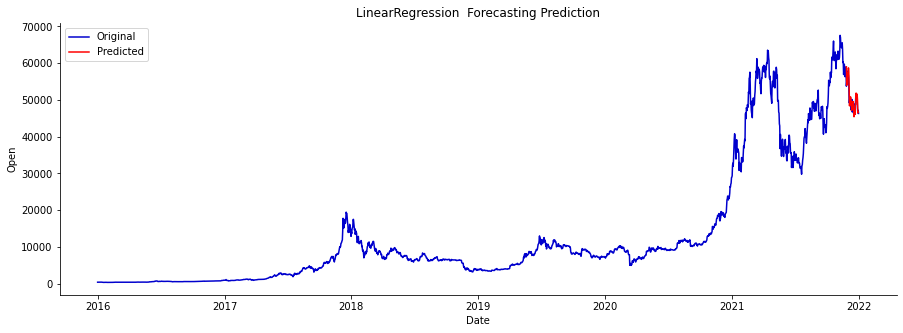

In [46]:
#Applying Linear Regression on time series data
run_model(train, test, LinearRegression(), 'LinearRegression')

##Random Forest Regressor

RMSE: 2613.9225379951354
MAE: 2064.7845982000003
R2 Score: 0.4282853750000154


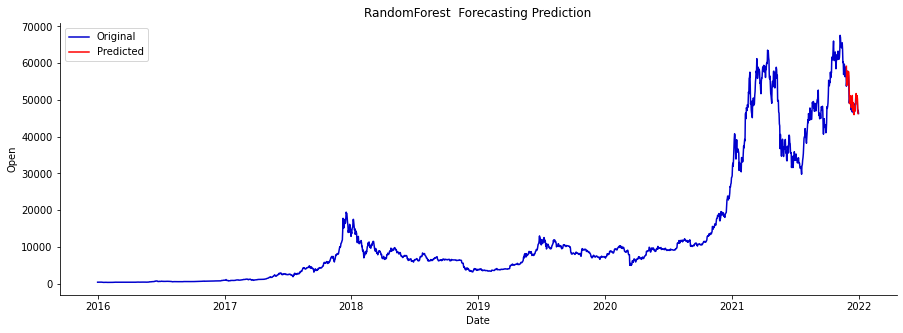

In [47]:
#Applying Random Forest (RF) Regressor on time series data
run_model(train, test, RandomForestRegressor(n_estimators=100, max_depth=20),'RandomForest')

XGBoost Regressor

RMSE: 2704.5815774703724
MAE: 2159.2848214
R2 Score: 0.3879399320124688


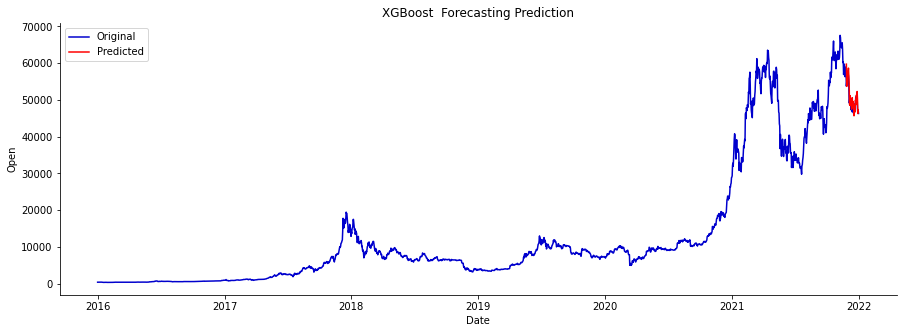

In [48]:
#Applying XGBoost Regressor on time series data
run_model(train, test, XGBRegressor( n_estimators=100, learning_rate=0.2, objective='reg:squarederror'), 'XGBoost')


LSTM (Deep Learning) Model

In [49]:
#Applying LSTM Model on time series data
#Function for Model build, training and prediction for LSTM Model
def lstm_model(train_data, test_data):
    
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
   
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), 
                   stateful=True))
    model.add(Dense(1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, 
              shuffle=False)
    predictions = model.predict(X_test,batch_size=1)
    
    original_df = price_df
    unscaled = undo_scaling(predictions, X_test, scaler_object, lstm=True)
    unscaled_df = predict_df(unscaled, original_df)
    
    get_scores(unscaled_df, original_df, 'LSTM')
    
    plot_results(unscaled_df, original_df, 'LSTM')

Epoch 1/200
2122/2122 [==============================] - 14s 5ms/step - loss: 0.0147
Epoch 2/200
2122/2122 [==============================] - 10s 5ms/step - loss: 0.0135
Epoch 3/200
2122/2122 [==============================] - 9s 4ms/step - loss: 0.0130
Epoch 4/200
2122/2122 [==============================] - 10s 4ms/step - loss: 0.0126
Epoch 5/200
2122/2122 [==============================] - 8s 4ms/step - loss: 0.0121
Epoch 6/200
2122/2122 [==============================] - 8s 4ms/step - loss: 0.0117
Epoch 7/200
2122/2122 [==============================] - 7s 3ms/step - loss: 0.0113
Epoch 8/200
2122/2122 [==============================] - 5s 2ms/step - loss: 0.0110
Epoch 9/200
2122/2122 [==============================] - 5s 2ms/step - loss: 0.0106
Epoch 10/200
2122/2122 [==============================] - 5s 2ms/step - loss: 0.0102
Epoch 11/200
2122/2122 [==============================] - 5s 2ms/step - loss: 0.0098
Epoch 12/200
2122/2122 [==============================] - 5s 2ms/step -

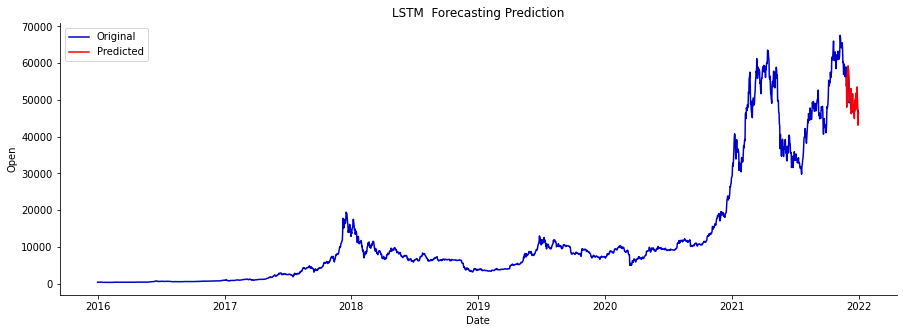

In [50]:
lstm_model(train, test)

In [51]:
pickle.dump(model_scores, open( "model_scores.p", "wb" ) )

##ARIMA Model

In [52]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA


In [53]:
ts_data=datetime_df.copy()
ts_data.reset_index(inplace=True)
ts_data.head()

,Date,price_diff
0,2016-01-02,3.901001
1,2016-01-03,-1.044006
2,2016-01-04,-3.516998
3,2016-01-05,3.007995
4,2016-01-06,-1.213012


In [54]:
train_data_arima = ts_data.iloc[:-35] 
test_data_arima= ts_data.iloc[-35:]       

In [55]:

#which can be used for defining model-arima() function
def model_arima(data):
  stepwise_fit = auto_arima(data['price_diff'], start_p=0, start_q=0,   
                          max_p=6, max_q=6, m=7,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)        
  stepwise_fit.plot_diagnostics(figsize=(10, 8));    
  stepwise_fit.summary()
  

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=35752.501, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=35750.978, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=35750.989, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=35752.978, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=35752.981, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=35754.981, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=35751.507, Time=0.14 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.743 seconds


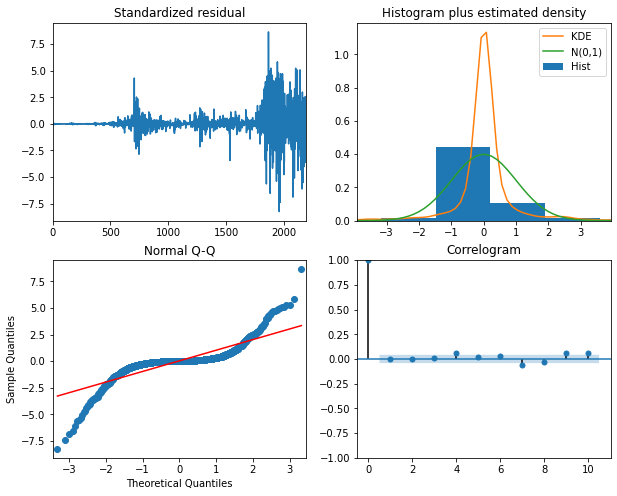

In [56]:

model_arima(ts_data)

Note : Choose the lowest AIC value order

In [57]:
#Function for forecasting by ARIMA Model

def arima_predictions(train,test,p,d,q):
  order=(p,d,q)
  model_arima = ARIMA(train['price_diff'].astype(float),order=order)
  results_arima = model_arima.fit()
  #  predictions
  start=len(train)
  end=len(train)+len(test)-1
  predictions_arima = results_arima.predict(start=start, end=end, dynamic=False, typ='levels').rename('Predictions')
  get_scores_arima(test,predictions_arima)         
  plot_results(train,test, predictions_arima, 'Arima_forecast')   
  #ts_data.iloc[:,1].plot(legend=True,figsize=(12,6));           
  #predictions_arima.plot(legend=True,figsize=(12,6));            
  #test.iloc[:,1].plot(legend=True,figsize=(12,6));               
  
  #print(type(predictions_arima))
  #return predictions_arima

In [58]:
def get_scores_arima(expected,predicted):  
    
    model_scores = {}
    
    rmse = np.sqrt(mean_squared_error(expected.iloc[:,1], predicted))
    mae = mean_absolute_error(expected.iloc[:,1],predicted)
    r2 = r2_score(expected.iloc[:,1], predicted)
    
    model_scores['ARIMA'] = [rmse, mae, r2]
    
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")
    
    pickle.dump(model_scores, open( "arima_model_scores.p", "wb" ))

In [59]:

def plot_results(train,test,predictions,model_name): 


    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(train.Date, train.price_diff, data=train, ax=ax,label='Original train', color='mediumblue')
    sns.lineplot(test.Date, test.price_diff, data=test, ax=ax,label='Original test', color='mediumblue')
    sns.lineplot(test.Date, predictions, data=test, ax=ax,label='predictions', color='Red')
    
    ax.set(xlabel = "Date",
           ylabel = "Open",
           title = f"{model_name} Forecasting Prediction")
    
    ax.legend()
    
    sns.despine()
    plt.savefig(f'/content/{model_name}_forecast.png')

RMSE: 1672.4226498455407
MAE: 1214.628855363429
R2 Score: -0.08696748542680943


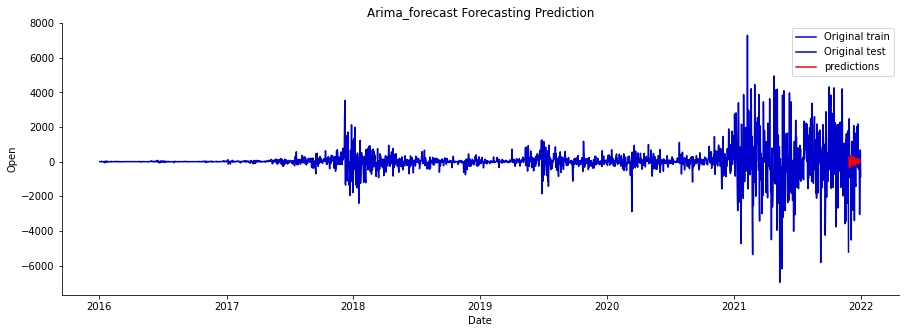

In [60]:
arima_predictions(train_data_arima,test_data_arima,2,0,2)

In [61]:

def plot_results(train,test,predictions,model_name):   
                                                        

    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(train.Date, train.price_diff, data=train, ax=ax,label='Original train', color='mediumblue')
    sns.lineplot(test.Date, test.price_diff, data=test, ax=ax,label='Original test', color='mediumblue')
    sns.lineplot(test.Date, predictions, data=test, ax=ax,label='predictions', color='Red')
    
    ax.set(xlabel = "Date",
           ylabel = "Open",
           title = f"{model_name} Forecasting Prediction")
    
    ax.legend()
    
    sns.despine()
    plt.savefig(f'/content/{model_name}_forecast.png')

##Prophet Model

In [62]:
def get_Profit_data(data):
    dt_data = data.set_index('Date').drop('price_diff', axis=1)
    dt_data.dropna(axis=0)   
                       
    return dt_data

In [63]:
prophet_data=get_Profit_data(price_df)
prophet_data.reset_index(inplace=True)
prophet_data.head()

,Date,Open
0,2016-01-01,430.721008
1,2016-01-02,434.622009
2,2016-01-03,433.578003
3,2016-01-04,430.061005
4,2016-01-05,433.069000


In [64]:
train_df= prophet_data[:-35]
test_df=prophet_data[-35:]
train_confirmed= pd.DataFrame()
train_confirmed['ds'] = train_df['Date']
train_confirmed['y']= train_df['Open']
model = Prophet()
model.fit(train_confirmed)
future_dates = model.make_future_dataframe(periods=24)
prediction = model.predict(future_dates)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Plot Our Prediction
model.plot(prediction)

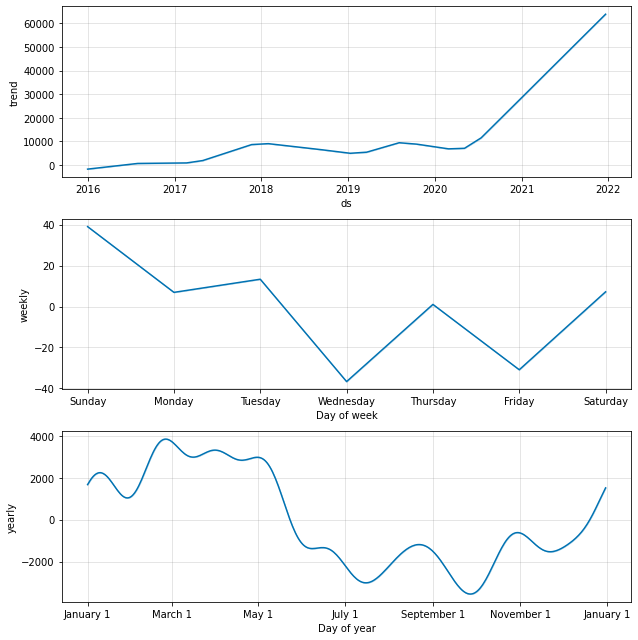

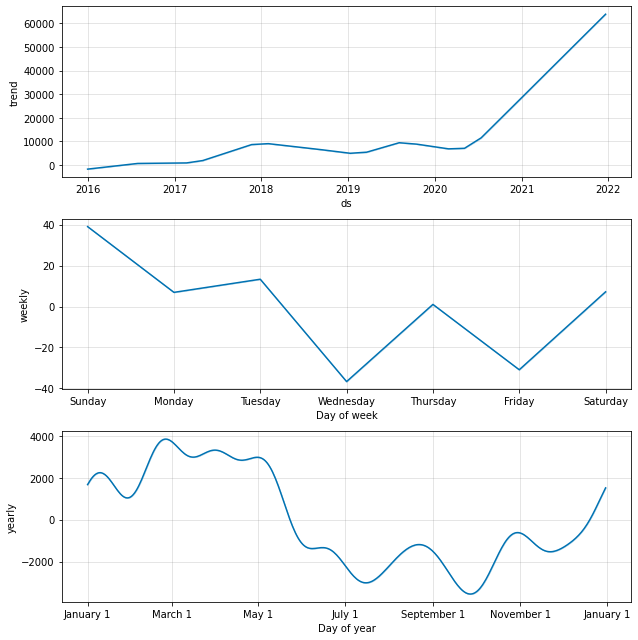

In [66]:
# Visualize Each Component [Trends,Weekly]
model.plot_components(prediction)



In [ ]:
rmse = np.sqrt(mean_squared_error(test_df.Open[-35:], prediction.yhat[-35:]))
mae = mean_absolute_error(test_df.Open[-35:], prediction.yhat[-35:])
r2 = r2_score(test_df.Open[-35:], prediction.yhat[-35:])
example_dict = {}
example_dict['Prophet'] = [rmse, mae, r2]
test_df['Open'].plot(legend=True,label='ORIGINAL',figsize=(12,5));
prediction['yhat'].plot(legend=True,label='PREDICTION'); 
pickle_out = open("prophet_model_scores.p","wb")
pickle.dump(example_dict, pickle_out)
pickle_out.close()
pickle_in = open("prophet_model_scores.p","rb")
example_dict = pickle.load(pickle_in)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

In [68]:

pickle_in = open("prophet_model_scores.p","rb")
prophet_dict = pickle.load(pickle_in)
print(prophet_dict)

{'Prophet': [11862.299838466699, 10957.660269907674, -10.77420708414486]}


##Holt Winter Model

In [69]:
def get_data(data):
    dt_data = data.set_index('Date').drop('price_diff', axis=1)
    dt_data.dropna(axis=0)   
                       
    return dt_data

In [70]:
holt_data=get_data(price_df)
holt_data.reset_index(inplace=True)
holt_data.tail()

,Date,Open
2188,2021-12-28,50679.859375
2189,2021-12-29,47623.871094
2190,2021-12-30,46490.605469
2191,2021-12-31,47169.371094
2192,2022-01-01,46311.746094


In [71]:
def holt(data,model_name):
  train_data=data[:-35]       
  test_data =data[-35:]
  train_data.drop(columns='Date',inplace=True)
  test_data.drop(columns='Date',inplace=True)
  holt_data['Double ES'] = ExponentialSmoothing(holt_data['Open'].astype(float),trend='add').fit().fittedvalues
  #holt_data[['Open','Triple ES']].plot(figsize=(12,5))
  fitted_model = ExponentialSmoothing(train_data['Open'].astype(float),trend='add').fit()
  test_predictions= fitted_model.forecast(35).rename(f'{model_name} Forecast')
  train_data['Open'].plot(figsize=(12,5),legend=True,label='Train')
  test_data['Open'].plot(legend=True,label='Test',figsize=(12,5));
  test_predictions.plot(legend=True,label='Prediction');  
  get_scores_holt(test_data['Open'],test_predictions,model_name)    

In [72]:
def get_scores_holt(test_data,predictions,model_name):
  model_name_dict = {}
  #model_scores = {}
  rmse = np.sqrt(mean_squared_error(test_data,predictions))
  mae = mean_absolute_error(test_data,predictions)
  r2 = r2_score(test_data,predictions)
  #model_scores['Holt Winter'] = [rmse, mae, r2]
  model_name_dict[f'{model_name}'] = [rmse, mae, r2]
  pickle_out = open(f'{model_name}_model_scores.p',"wb")    
  pickle.dump(model_name_dict, pickle_out)                     
  pickle_out.close()
  pickle_in = open(f'{model_name}_model_scores.p',"rb")         
  model_name_dict = pickle.load(pickle_in)
  print(model_name_dict)
  print(f"RMSE: {rmse}")
  print(f"MAE: {mae}")
  print(f"R2 Score: {r2}")
 # pickle.dump(model_scores, open( "Holt_model_scores.p", "wb" ))

{'Holt': [5289.251261312984, 4896.751886145935, -1.3408968209410563]}
RMSE: 5289.251261312984
MAE: 4896.751886145935
R2 Score: -1.3408968209410563


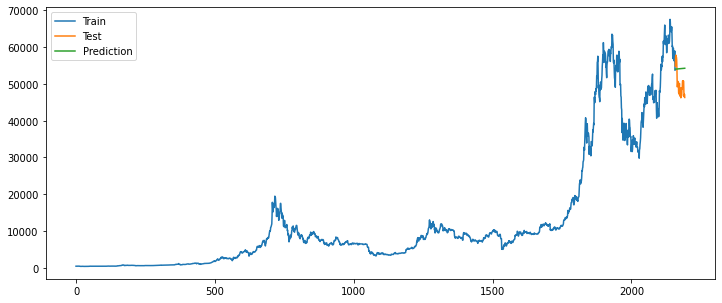

In [73]:
holt(holt_data,'Holt')

In [74]:
pickle_in = open("Holt_model_scores.p","rb")      
holtwinter_dict = pickle.load(pickle_in)          
print(holtwinter_dict)

{'Holt': [5289.251261312984, 4896.751886145935, -1.3408968209410563]}


##**Create Results Dataframe**

In [75]:
def create_results_df():
    results_dict = pickle.load(open("model_scores.p", "rb"))
    
    
    results_dict.update(pickle.load(open("arima_model_scores.p", "rb")))

    #results_dict.update(pickle.load(open("sarimax_model_scores.p", "rb")))


    results_dict.update(pickle.load(open("prophet_model_scores.p", "rb")))

    results_dict.update(pickle.load(open("Holt_model_scores.p", "rb")))

    restults_df = pd.DataFrame.from_dict(results_dict, orient='index', 
                                        columns=['RMSE', 'MAE','R2'])
    
    restults_df = restults_df.sort_values(by='RMSE', ascending=False).reset_index()
    
    return restults_df
    create_results_df.to_csv('confirmed_index_df.csv')

In [76]:
results = create_results_df()
results

,index,RMSE,MAE,R2
0,Prophet,11862.299838,10957.660270,-10.774207
1,Holt,5289.251261,4896.751886,-1.340897
2,LSTM,3374.892493,2438.135268,0.046954
3,XGBoost,2704.581577,2159.284821,0.387940
4,LinearRegression,2687.256171,2041.884821,0.395756
5,RandomForest,2613.922538,2064.784598,0.428285
6,ARIMA,1672.422650,1214.628855,-0.086967


In [77]:
results.to_csv('confirmed_index.csv')

 **Plot Results**

In [78]:
def plot_results(results_df):
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.lineplot(np.arange(len(results_df)), 'RMSE', data=results_df, ax=ax, 
                 label='RMSE', color='mediumblue')
    sns.lineplot(np.arange(len(results_df)), 'MAE', data=results_df, ax=ax, 
                 label='MAE', color='Cyan')
    sns.lineplot(np.arange(len(results_df)), 'R2', data=results_df, ax=ax, 
                 label='R2', color='Green')
    
    plt.xticks(np.arange(len(results_df)),rotation=45)
    ax.set_xticklabels(results_df['index'])
    ax.set(xlabel = "Model",
           ylabel = "Scores",
           title = "Model Error Comparison")
    sns.despine()
plt.savefig(f'/content/models_forecast.png')

<Figure size 432x288 with 0 Axes>

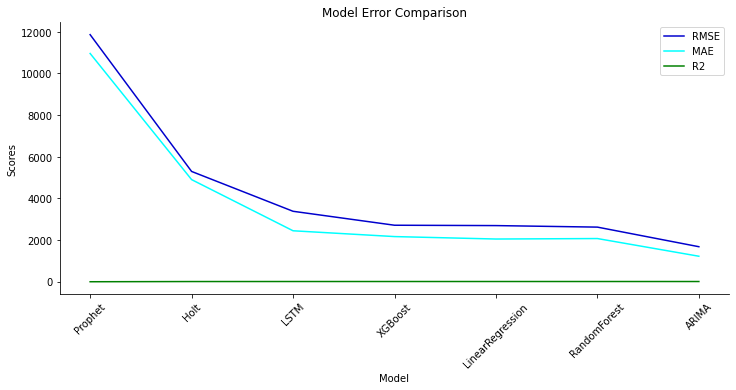

In [79]:
plot_results(results)

In [ ]:
plt.savefig('results_forecast.png')

In [81]:
from pandas.core import algorithms
average_stock_price= 13005.79287097169
algorithms =1672.422650
percentage_off = round(algorithms/average_stock_price*100, 2)

print(f"With , prediction is within {percentage_off}% of the actual.")

With , prediction is within 12.86% of the actual.
With , prediction is within 12.86% of the actual.


Arima is best ALgorithms Model for the Stock prediction .the result is 12.86% acuurate than actual values.